In [2]:
# 407PROJ

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

performance = pd.read_csv("StudentPerformanceFactors.csv")
performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:

# make a new dataframe with encoded NUMERIC variables
encoded = performance

encoded["n_parental_involvement"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Parental_Involvement"]] # list comprehension
encoded["n_access_to_resources"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Access_to_Resources"]]
encoded["n_extracurriculars"] = [0 if x == 'No' else 1 for x in encoded["Extracurricular_Activities"]]
encoded["n_motivation"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Motivation_Level"]]
encoded["n_internet"] = [0 if x == 'No' else 1 for x in encoded["Internet_Access"]]
encoded["n_family_income"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Family_Income"]]
encoded["n_teacher_quality"] = [0 if x == 'Low' else 1 if x == 'Medium' else 2 for x in encoded["Teacher_Quality"]]
encoded["n_schooltype"] = [0 if x == 'Public' else 1 for x in encoded["School_Type"]]
encoded["n_peer_influence"] = [0 if x == 'Negative' else 1 if x == 'Neutral' else 2 for x in encoded["Peer_Influence"]]
encoded["n_learning_disabilities"] = [0 if x == 'No' else 1 for x in encoded["Learning_Disabilities"]]
encoded["n_parentaleducation"] = [0 if x == 'High School' else 1 if x == 'College' else 2 for x in encoded["Parental_Education_Level"]]
encoded["n_distance_from_home"] = [0 if x == 'Near' else 1 if x == 'Moderate' else 2 for x in encoded["Distance_from_Home"]]
encoded["n_gender"] = [0 if x == 'Male' else 1 for x in encoded["Gender"]]

# move exam scores column to the end
encoded["ExamScore"] = encoded["Exam_Score"]

encoded = encoded.drop(columns=["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level", "Internet_Access",
                     "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level",
                     "Distance_from_Home", "Gender", "Exam_Score"])

encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,n_parental_involvement,n_access_to_resources,n_extracurriculars,n_motivation,n_internet,n_family_income,n_teacher_quality,n_schooltype,n_peer_influence,n_learning_disabilities,n_parentaleducation,n_distance_from_home,n_gender,ExamScore
0,23,84,7,73,0,3,0,2,0,0,1,0,1,0,2,0,0,0,0,67
1,19,64,8,59,2,4,0,1,0,0,1,1,1,0,0,0,1,1,1,61
2,24,98,7,91,2,4,1,1,1,1,1,1,1,0,1,0,2,0,0,74
3,29,89,8,98,1,4,0,1,1,1,1,1,1,0,0,0,0,1,0,71
4,19,92,6,65,3,4,1,1,1,1,1,1,2,0,1,0,1,0,1,70


In [5]:
# convert all nums to number types
for col in encoded.columns:
    if not isinstance(encoded[col][0], float) or isinstance(encoded[col][0], int):
        encoded[col] = encoded[col].astype(float)

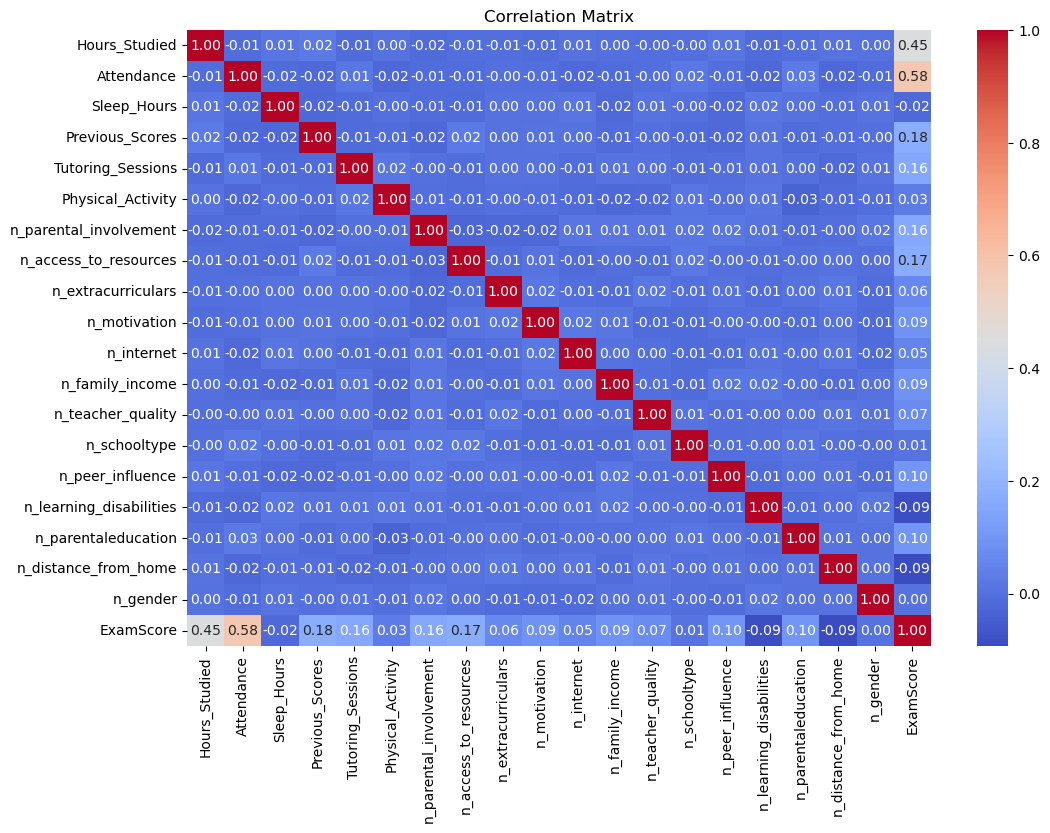

In [6]:
# Calculate correlations for country-level data
corr = encoded.corr()

# Heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Visualizations

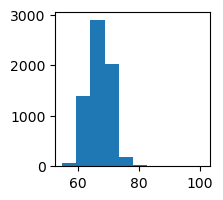

In [7]:
plt.figure(figsize=(2,2))
plt.hist(encoded["ExamScore"]) # y is approximately normally distributed (good for regression purposes)
plt.show()

### visualize the top "correlated" variables that are encoded discrete categorical values (e.g. parental involvement: 0, 1, 2), to see if they actually cause any difference in exam score

Text(0.5, 1.0, 'peer influence vs exam score')

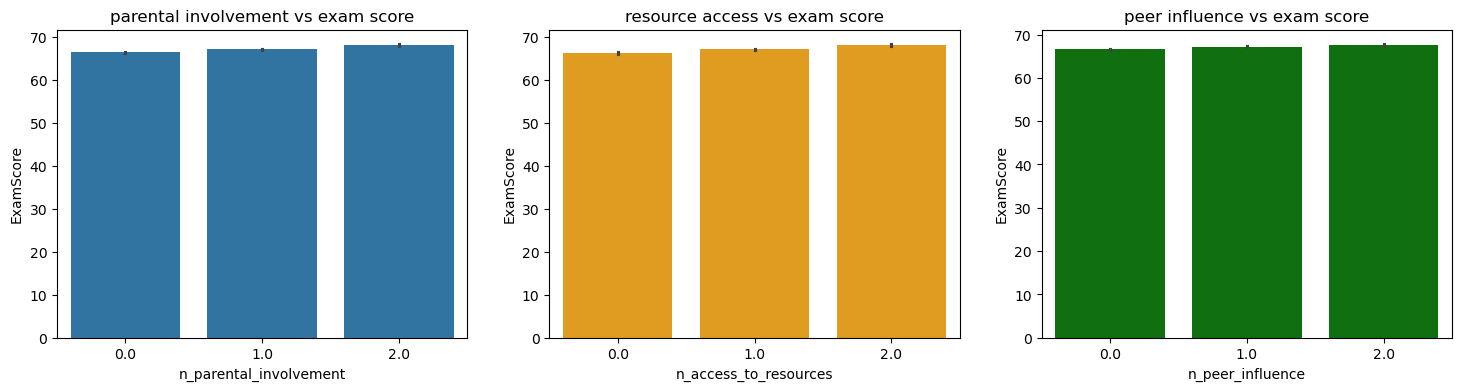

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # 3 plots

sns.barplot(x='n_parental_involvement', y='ExamScore', data=encoded, ax=axes[0])
axes[0].set_title("parental involvement vs exam score")

sns.barplot(x='n_access_to_resources', y='ExamScore', data=encoded, ax=axes[1], color='orange')
axes[1].set_title("resource access vs exam score")

sns.barplot(x='n_peer_influence', y='ExamScore', data=encoded, ax=axes[2], color='green')
axes[2].set_title("peer influence vs exam score")

Encoded categorical variables like parental involvement, access to resources, and peer influence do not actually affect exam score that much.

From this, and from the correlation matrix above, we can see that the variables that most affect ExamScore are **Hours_Studied, Attendance, and Previous_Scores.**

### Let's use a subset selection to test different models (using k-fold cross validation)

1. use our subset of variables for multiple regression
2. test that multiple regression model on test set
3. use our subset of variables for a decision tree
4. test that decision tree model on test set

5. compare the two models for error

In [15]:
# Example data
X = encoded[["Hours_Studied", "Attendance"]]
y = encoded['ExamScore'] 

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
# Scatter plot of the data points
plt.scatter(X['Hours_Studied'], y, alpha=0.5, label="Actual Data", s=10)  # Adjust 's' for point size
# Regression line
plt.plot(X['Hours_Studied'], y_pred, color='red', label="Regression Line", linewidth=2)

# Labels and legend
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.legend()
plt.show()


In [17]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    mse = ((actual_y - predicted_y)**2).mean()
    return np.sqrt(mse)


In [19]:
print(rmse(y, y_pred))

2.6348287508013026




The error shows that we are predicting within about 3 exam points. However, our model is likely very overfit. This being said, we want to look at our data in terms of training and test sets to find a better model.

Next, let's try to fit a more flexible model like a decision tree. Since it's a categorical classifier predictor, we need something we can classify. Let's divide exam scores into classes to predict high/medium/low scores given our 2 predictor variables.

In [51]:
def classify_score(df):
    score_quantiles = np.percentile(df['ExamScore'], [33, 66]) # divide in 3 groups
    df['examscore_class'] = pd.cut( # add a column for classification
        df['ExamScore'],
        bins=[-np.inf, score_quantiles[0], score_quantiles[1], np.inf],
        labels=[0,1,2]
    )

classify_score(encoded)
encoded.head(1)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,n_parental_involvement,n_access_to_resources,n_extracurriculars,n_motivation,...,n_family_income,n_teacher_quality,n_schooltype,n_peer_influence,n_learning_disabilities,n_parentaleducation,n_distance_from_home,n_gender,ExamScore,examscore_class
0,23.0,84.0,7.0,73.0,0.0,3.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,67.0,1


In [60]:
# SPLIT IN TRAIN/TEST SETS!
from sklearn.model_selection import train_test_split

np.random.seed(45)

# REDEFINE OUR X AND Y
select_vars = encoded[['Hours_Studied', 'Attendance', 'Previous_Scores']] # select cols
y = np.array(encoded['examscore_class'])

X_train, X_Holdout, Y_train, Y_holdout = train_test_split(select_vars, y, test_size = 0.2) # larger test set to test data


In [61]:
# we need a function to determine error from our classification models, let's just evaluate overall accuracy of predictions.
# our function will be INACCURACIES, so that we can MINIMIZE (same as maximizing accuracy)

def inaccuracy(actual_y, predicted_y):
    correct_predictions = (actual_y == predicted_y).sum() # num correct predictions
    total_predictions = len(actual_y) # total
    return 1 - correct_predictions / total_predictions

In [62]:
# function to optimize the hyperparameter of our model

from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train): # X_train is a 2D array/df with the features for training, Y_train is an array of the corresponding target values
    '''
    Split the training data into 4 subsets.
    
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    
    Return the average RMSE of these 4 folds.

    ARGS:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = np.empty(0) # empty array to store error from each split

    Y_train = np.array(Y_train)
        
    for train_idx, valid_idx in kf.split(X_train): # iterate through each split, train_idx and valid_idx are indices which represent row positions
        # split the data (into train & validation)
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx] # .iloc : select rows by indices of train & validation
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx] # index withough iloc b/c Y is a 1D array

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)

        # Predict housing prices on the test set
        pred_Y_valid = model.predict(split_X_valid)
        
        # Compute the INACCURACY on the validation split
        error = inaccuracy(split_Y_valid, pred_Y_valid) # between actual validation Y and predicted Y

        validation_errors = np.append(validation_errors, error)
        
    return np.mean(validation_errors) # return average error from all splits

<Axes: xlabel='depth', ylabel='cv error'>

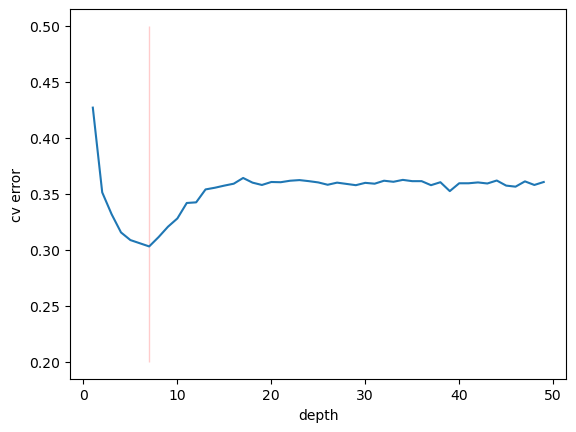

In [78]:
# DECISION TREE:
from sklearn.tree import DecisionTreeClassifier

depths = np.arange(1,50)

# we want to find the tree depth that gives us the minimum CV error
cverrors=[]
for depth in depths:  
    tree = DecisionTreeClassifier(max_depth=depth)  
    error=compute_CV_error(tree, X_train, Y_train)
    cverrors.append(error)

depth_vs_error = pd.DataFrame({'depth': depths, 'cv error': cverrors})
minimum = depth_vs_error[depth_vs_error['cv error'] == (depth_vs_error['cv error']).min()] # optimized hyperparameter
best_depth = minimum.iloc[0,0]

sns.lineplot(x='depth', y='cv error', data=depth_vs_error)
sns.lineplot(x=[best_depth, best_depth], y=[0.2,0.5], color='red')

In [82]:
from sklearn.metrics import accuracy_score

final_tree = DecisionTreeClassifier(max_depth=best_depth)

# Fit the model to the training data
final_tree.fit(X_train, Y_train)

# Make predictions on the validation/test set
Y_pred = final_tree.predict(X_Holdout)  # Replace X_test with your actual test data

# Evaluate the model's performance
accuracy = accuracy_score(Y_holdout, Y_pred)  # Replace Y_test with your actual test labels

accuracy

0.6959152798789713

We successfully made a decision tree model with around 70% accuracy in its predictions of exam scores ('high', 'medium' and 'low' scores)!